<h3>Part 1 -- Autoencoder </h3>
<h5>Each cifar image is 32 X 32 X 3. This will be compressed to 8 X 8 X 8 using an autoencoder (3072 variables to 512 variables).</h5>

In [9]:
from keras.datasets import cifar100
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, Sequential, load_model
import os
import copy
import matplotlib.pyplot as plt
import numpy as np
from autoencoder_utils import *
import math
import cv2

import matplotlib.pyplot as plt


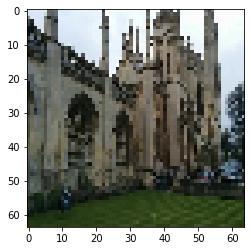

In [10]:

path=r'C:\Users\HAMROUA\Desktop\Aymen\KingsCollege\\'

all_images = []
imagename={}
import glob, os

#TimePreprocessing
sequences=['seq1','seq2','seq3','seq4','seq5','seq6','seq7','seq8']    
for sequence in sequences:
    os.chdir(path+sequence)
    for file in glob.glob("*.png"):
        img = cv2.imread(file , 1)
        img = cv2.resize(img,(64, 64))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        all_images.append(img)
        imagename[sequence+'/'+file]=np.reshape(img, (1, 64, 64, 3)) / 255.


In [11]:
print(imagename)

{'seq1/frame00001.png': array([[[[0.2627451 , 0.29803922, 0.3254902 ],
         [0.75686275, 0.83529412, 0.89019608],
         [0.75686275, 0.83529412, 0.89019608],
         ...,
         [0.89803922, 0.94509804, 0.96862745],
         [0.90588235, 0.95294118, 0.97647059],
         [0.89803922, 0.94509804, 0.97647059]],

        [[0.67843137, 0.71372549, 0.75686275],
         [0.75294118, 0.83137255, 0.88627451],
         [0.74901961, 0.83529412, 0.89019608],
         ...,
         [0.89803922, 0.94509804, 0.96862745],
         [0.89411765, 0.94117647, 0.96470588],
         [0.89019608, 0.9372549 , 0.96078431]],

        [[0.7254902 , 0.76078431, 0.81176471],
         [0.74117647, 0.82745098, 0.88235294],
         [0.74509804, 0.83137255, 0.88627451],
         ...,
         [0.89019608, 0.9372549 , 0.96078431],
         [0.89019608, 0.9372549 , 0.96078431],
         [0.88627451, 0.93333333, 0.96470588]],

        ...,

        [[0.34901961, 0.38039216, 0.33333333],
         [0.25882353,

In [12]:
rows = []

FinalData=[]
with open(path+'dataset.csv') as f:
    for line in f:
        # strip whitespace
        line = line.strip()
        # separate the columns
        line = line.split(',')
        # save the line for use later
        rows.append(line)
for i in range(0,len(rows)*4//5):
    image=imagename[rows[i][0]]
    Time=np.reshape([float(rows[i][1])]*64*3*3, ( 1,64, 3, 3))
    X= np.reshape([float(rows[i][2])]*64*3*3, (1, 64, 3, 3))
    Y= np.reshape([float(rows[i][3])]*64*3*3, (1,64, 3, 3))
    Z= np.reshape([float(rows[i][4])]*64*3*3, (1,64, 3, 3))
    W= np.reshape([float(rows[i][5])]*64*3*3, (1,64, 3, 3))
    P= np.reshape([float(rows[i][6])]*64*3*3, (1,64, 3, 3))
    Q= np.reshape([float(rows[i][7])]*64*3*3, (1,64, 3, 3))
    R= np.reshape([float(rows[i][8])]*64*3*3, (1,64, 3, 3))
    Data= np.concatenate((image,Time,X,Y,Z,W,P,Q,R), axis=2)
    FinalData.append(Data)

X_train = np.reshape(FinalData, (len(FinalData), 64, 88, 3))
#X_train=X_train[:,:,0:64,:]
FinalData=[]
for i in range(len(rows)*4//5,len(rows)):
    image=imagename[rows[i][0]]
    Time=np.reshape([float(rows[i][1])]*64*3*3, ( 1,64, 3, 3))
    X= np.reshape([float(rows[i][2])]*64*3*3, (1, 64, 3, 3))
    Y= np.reshape([float(rows[i][3])]*64*3*3, (1,64, 3, 3))
    Z= np.reshape([float(rows[i][4])]*64*3*3, (1,64, 3, 3))
    W= np.reshape([float(rows[i][5])]*64*3*3, (1,64, 3, 3))
    P= np.reshape([float(rows[i][6])]*64*3*3, (1,64, 3, 3))
    Q= np.reshape([float(rows[i][7])]*64*3*3, (1,64, 3, 3))
    R= np.reshape([float(rows[i][8])]*64*3*3, (1,64, 3, 3))
    Data= np.concatenate((image,Time,X,Y,Z,W,P,Q,R), axis=2)
    FinalData.append(Data)
X_test = np.reshape(FinalData, (len(FinalData), 64, 88, 3))
#X_test=X_test[:,:,0:64,:]



In [13]:
print(X_train.shape)
print(X_test.shape)

(1248, 64, 88, 3)
(312, 64, 88, 3)


In [14]:
X_test[0][0,87]

array([0.19449634, 0.19449634, 0.19449634])

In [15]:
autoencoder = Sequential()

input_shape = (64, 88, 3)
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', input_shape=input_shape))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(MaxPooling2D((2, 2)))
autoencoder.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(MaxPooling2D((2, 2)))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))

autoencoder.add(Conv2D(8, (3, 3), activation='sigmoid', padding='same', name='encoded_layer'))
#at this point, 'encoded' is (8, 8, 8)

autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
autoencoder.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_crossentropy'])
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 64, 88, 16)        448       
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 88, 32)        4640      
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 88, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 44, 64)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 44, 128)       73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 44, 64)        73792     
                                                      

In [19]:
epochs = 100
batch_size = 64
training_batch_size = 500
number_training_batch_per_epoch = math.ceil(X_train.shape[0] / training_batch_size)
hist=[]
#not the most ideal way of iterating through a dataset
for epoch in range(epochs):
    print('epoch: {}'.format(epoch))
    np.random.shuffle(X_train)
    np.random.shuffle(X_test)
    for batchnum in range(number_training_batch_per_epoch):
        X_train_batch = X_train[batchnum*training_batch_size : (batchnum+1)*training_batch_size]
        history=autoencoder.fit(X_train_batch, X_train_batch,
                        epochs=1,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_data=(X_test[0:200], X_test[0:200]))
        hist.append(history)


epoch: 0
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 2s 3ms/sample - loss: 0.5132 - binary_crossentropy: 0.5132 - val_loss: 0.5072 - val_binary_crossentropy: 0.5072
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5152 - binary_crossentropy: 0.5152 - val_loss: 0.5093 - val_binary_crossentropy: 0.5093
Train on 248 samples, validate on 200 samples
248/248 [==============================] - 1s 3ms/sample - loss: 0.5213 - binary_crossentropy: 0.5213 - val_loss: 0.5085 - val_binary_crossentropy: 0.5085
epoch: 1
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5142 - binary_crossentropy: 0.5142 - val_loss: 0.5071 - val_binary_crossentropy: 0.5071
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5198 - binary_crossentropy: 0.5198 - val_loss: 0.5122 - val_binar

500/500 [==============================] - 2s 3ms/sample - loss: 0.5132 - binary_crossentropy: 0.5132 - val_loss: 0.5060 - val_binary_crossentropy: 0.5060
Train on 248 samples, validate on 200 samples
248/248 [==============================] - 1s 4ms/sample - loss: 0.5158 - binary_crossentropy: 0.5158 - val_loss: 0.5066 - val_binary_crossentropy: 0.5066
epoch: 14
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 2s 3ms/sample - loss: 0.5107 - binary_crossentropy: 0.5107 - val_loss: 0.5033 - val_binary_crossentropy: 0.5033
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 2s 3ms/sample - loss: 0.5158 - binary_crossentropy: 0.5158 - val_loss: 0.5037 - val_binary_crossentropy: 0.5037
Train on 248 samples, validate on 200 samples
248/248 [==============================] - 1s 4ms/sample - loss: 0.5147 - binary_crossentropy: 0.5147 - val_loss: 0.5046 - val_binary_crossentropy: 0.5046
epoch: 15
Train on 500 samples,

248/248 [==============================] - 1s 3ms/sample - loss: 0.5179 - binary_crossentropy: 0.5179 - val_loss: 0.5045 - val_binary_crossentropy: 0.5045
epoch: 27
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5109 - binary_crossentropy: 0.5109 - val_loss: 0.5049 - val_binary_crossentropy: 0.5049
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5142 - binary_crossentropy: 0.5142 - val_loss: 0.5045 - val_binary_crossentropy: 0.5045
Train on 248 samples, validate on 200 samples
248/248 [==============================] - 1s 3ms/sample - loss: 0.5153 - binary_crossentropy: 0.5153 - val_loss: 0.5057 - val_binary_crossentropy: 0.5057
epoch: 28
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5159 - binary_crossentropy: 0.5159 - val_loss: 0.5063 - val_binary_crossentropy: 0.5063
Train on 500 samples,

500/500 [==============================] - 1s 3ms/sample - loss: 0.5117 - binary_crossentropy: 0.5117 - val_loss: 0.5046 - val_binary_crossentropy: 0.5046
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5137 - binary_crossentropy: 0.5137 - val_loss: 0.5045 - val_binary_crossentropy: 0.5045
Train on 248 samples, validate on 200 samples
248/248 [==============================] - 1s 3ms/sample - loss: 0.5142 - binary_crossentropy: 0.5142 - val_loss: 0.5041 - val_binary_crossentropy: 0.5041
epoch: 41
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5135 - binary_crossentropy: 0.5135 - val_loss: 0.5051 - val_binary_crossentropy: 0.5051
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5105 - binary_crossentropy: 0.5105 - val_loss: 0.5049 - val_binary_crossentropy: 0.5049
Train on 248 samples, validate 

500/500 [==============================] - 1s 3ms/sample - loss: 0.5116 - binary_crossentropy: 0.5116 - val_loss: 0.5026 - val_binary_crossentropy: 0.5026
Train on 248 samples, validate on 200 samples
248/248 [==============================] - 1s 3ms/sample - loss: 0.5074 - binary_crossentropy: 0.5074 - val_loss: 0.5026 - val_binary_crossentropy: 0.5026
epoch: 54
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5087 - binary_crossentropy: 0.5087 - val_loss: 0.5030 - val_binary_crossentropy: 0.5030
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5160 - binary_crossentropy: 0.5160 - val_loss: 0.5051 - val_binary_crossentropy: 0.5051
Train on 248 samples, validate on 200 samples
248/248 [==============================] - 1s 3ms/sample - loss: 0.5146 - binary_crossentropy: 0.5146 - val_loss: 0.5044 - val_binary_crossentropy: 0.5044
epoch: 55
Train on 500 samples,

248/248 [==============================] - 1s 3ms/sample - loss: 0.5116 - binary_crossentropy: 0.5116 - val_loss: 0.5016 - val_binary_crossentropy: 0.5016
epoch: 67
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5116 - binary_crossentropy: 0.5116 - val_loss: 0.5050 - val_binary_crossentropy: 0.5050
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5114 - binary_crossentropy: 0.5114 - val_loss: 0.5049 - val_binary_crossentropy: 0.5049
Train on 248 samples, validate on 200 samples
248/248 [==============================] - 1s 3ms/sample - loss: 0.5117 - binary_crossentropy: 0.5117 - val_loss: 0.5049 - val_binary_crossentropy: 0.5049
epoch: 68
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5112 - binary_crossentropy: 0.5112 - val_loss: 0.5030 - val_binary_crossentropy: 0.5030
Train on 500 samples,

500/500 [==============================] - 1s 3ms/sample - loss: 0.5077 - binary_crossentropy: 0.5077 - val_loss: 0.5033 - val_binary_crossentropy: 0.5033
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5149 - binary_crossentropy: 0.5149 - val_loss: 0.5028 - val_binary_crossentropy: 0.5028
Train on 248 samples, validate on 200 samples
248/248 [==============================] - 1s 3ms/sample - loss: 0.5119 - binary_crossentropy: 0.5119 - val_loss: 0.5032 - val_binary_crossentropy: 0.5032
epoch: 81
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5137 - binary_crossentropy: 0.5137 - val_loss: 0.5048 - val_binary_crossentropy: 0.5048
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5128 - binary_crossentropy: 0.5128 - val_loss: 0.5043 - val_binary_crossentropy: 0.5043
Train on 248 samples, validate 

500/500 [==============================] - 1s 3ms/sample - loss: 0.5105 - binary_crossentropy: 0.5105 - val_loss: 0.5026 - val_binary_crossentropy: 0.5026
Train on 248 samples, validate on 200 samples
248/248 [==============================] - 1s 3ms/sample - loss: 0.5124 - binary_crossentropy: 0.5124 - val_loss: 0.5029 - val_binary_crossentropy: 0.5029
epoch: 94
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5124 - binary_crossentropy: 0.5124 - val_loss: 0.5028 - val_binary_crossentropy: 0.5028
Train on 500 samples, validate on 200 samples
500/500 [==============================] - 1s 3ms/sample - loss: 0.5114 - binary_crossentropy: 0.5114 - val_loss: 0.5023 - val_binary_crossentropy: 0.5023
Train on 248 samples, validate on 200 samples
248/248 [==============================] - 1s 3ms/sample - loss: 0.5080 - binary_crossentropy: 0.5080 - val_loss: 0.5032 - val_binary_crossentropy: 0.5032
epoch: 95
Train on 500 samples,

In [33]:
hist1=[hist[i].history['loss'] for i in range(0,len(hist))]
hist2=[hist[i].history['val_loss'] for i in range(0,len(hist))]

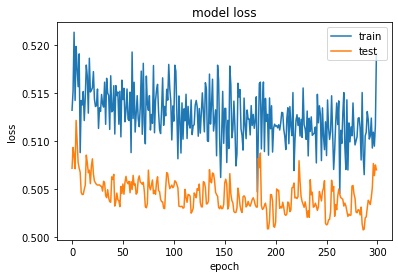

In [34]:
#import h5py

#autoencoder.save('autoencoder_ISCAS.h5')
#autoencoder = load_model('autoencoder_MWSCAS.h5')
plt.plot(hist1)
plt.plot(hist2)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [35]:
print(history.history['val_loss'])

[0.5070257234573364]


In [36]:
X_test_to_show.shape

NameError: name 'X_test_to_show' is not defined

<h5>
The code below displays the original and autoencoded versions of 10 images.
<br>
In most cases, the original object can be discerned from the autoencoded version of the image.
</h5>

C:\Users\HAMROUA\Anaconda3\envs\GPUtensorflow\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


(10, 64, 88, 3)
[[[0.9372549  0.98823529 0.98431373]
  [0.94509804 0.99607843 0.99215686]
  [0.45490196 0.49411765 0.49019608]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]]

 [[0.9372549  0.98823529 0.98431373]
  [0.94509804 0.99607843 0.99215686]
  [0.47058824 0.50588235 0.51372549]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]]

 [[0.9372549  0.98823529 0.98431373]
  [0.94509804 0.99607843 0.99215686]
  [0.46666667 0.50196078 0.50980392]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]]

 ...

 [[0.49803922 0.49803922 0.42352941]
  [0.46666667 0.4745098  0.41176471]
  [0.49411765 0.49411765 0.43529412]
  ...
  [0.16078431 0.16470588 0.11764706]
  [0.31372549 0.31764706 0.27058824]
  [0.28627451 0.27058824 0.23137255]]

 [[0.45490196 0.43921569 0.35686275]
  [0.56862745 0.53333

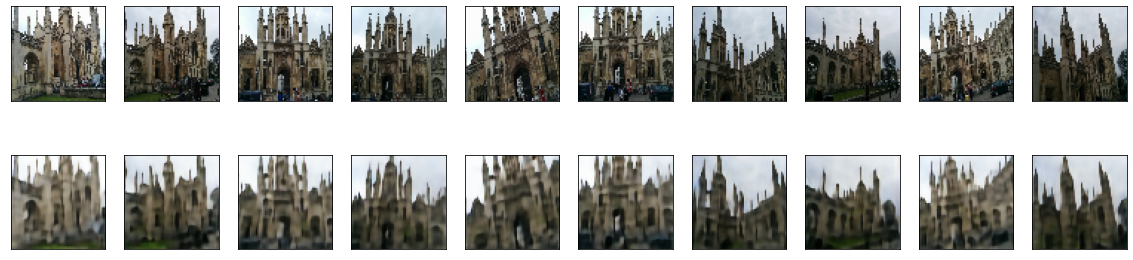

In [37]:
n = 10
img_to_show_idx = np.random.choice(range(X_test.shape[0]), n, replace=False)
X_test_to_show = X_test[img_to_show_idx]
aft_autoencode = autoencoder.predict(X_test_to_show)
print(aft_autoencode.shape)
print(X_test_to_show[0][0:64,0:64,:])
print('AAAA')
print(aft_autoencode[0][0:64,0:64,:])
fig = plt.figure(figsize=(n*2, 5))
plt.gray()
img_shape = (64, 64, 3)

for i in range(n):
    #display original
    display_single_subplot(X_test_to_show[i][0:64,0:64,:].reshape(img_shape), n_row=2, n_col=n, cell_num=i+1)
    #display aft autoencoding
    display_single_subplot(aft_autoencode[i][0:64,0:64,:].reshape(img_shape), n_row=2, n_col=n, cell_num=n+i+1)

plt.show()

<h3>
Part 2 -- selecting similar images
</h3>
<h5>
Given an image, select the most similar and dissimilar images, using binary cross entropy to determine similarity
</h5>

In [38]:
#find images similar to the image at this index

img_to_find_idx = 111
alldataset=np.concatenate((X_test, X_train), axis=0)
layer_name = 'encoded_layer'
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(layer_name).output)

similarity_sorted = get_sorted_similarity_idx(encoder, img_to_find_idx, dataset=alldataset, loss='binary_crossentropy')


In [39]:
similarity_sorted


array([  49,  238,  288, ...,  348, 1507,  646], dtype=int64)

<h5>
In most cases, images with a similar color / shape are deemed to be similar.
<br><br>
Images containing the same type of object aren't deemed to be similar, since the comparison function doesn't take object type into account.
</h5>

IndexError: index 646 is out of bounds for axis 0 with size 312

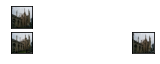

In [40]:
#show original image, n most similar images, n most dissimilar images
n = 2
image_dataset = X_test

plt.figure(figsize=(n*2, n/1.5))
img_shape = (64, 64, 3)

#display original
display_single_subplot(image_dataset[img_to_find_idx][0:64,0:64,:].reshape(img_shape), n_row=3, n_col=n, cell_num=1)

# #display most similar
for i in range(n):
    similar_idx = similarity_sorted[i]
    display_single_subplot(image_dataset[similar_idx][0:64,0:64,:].reshape(img_shape), n_row=3, n_col=n, cell_num=n+i+1)

# #display most dissimilar
for i in range(n):
    dissimilar_idx = similarity_sorted[-i-1]
    display_single_subplot(image_dataset[dissimilar_idx][0:64,0:64,:].reshape(img_shape), n_row=3, n_col=n, cell_num=2*n+i+1)

plt.show()

<h5>Compare to 'baseline', binary cross entropy comparison of original image pixels.</h5>

In [41]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
from keras.losses import binary_crossentropy
from tensorflow.keras.losses import cosine_similarity 
import copy


img_to_find_idx = 111
dataset = copy.deepcopy(X_test)
dataset = dataset.reshape(dataset.shape[0], -1)
#initializing vars to pass into tensorflow
X_selected = [dataset[img_to_find_idx].tolist() for _ in range(dataset.shape[0])]
X_all = dataset.tolist()

X_selected_tf = tf.Variable(X_selected, tf.float32)
X_all_tf = tf.Variable(X_all, tf.float32)
loss_tf = binary_crossentropy(X_selected_tf, X_all_tf)
init_op = tf.global_variables_initializer()

similarity = []
with tf.Session() as sess:
    sess.run(init_op)
    similarity = sess.run(loss_tf)
similarity_sorted = np.argsort(np.array(similarity))[1:] #the same figure appears in X_all too, so remove it

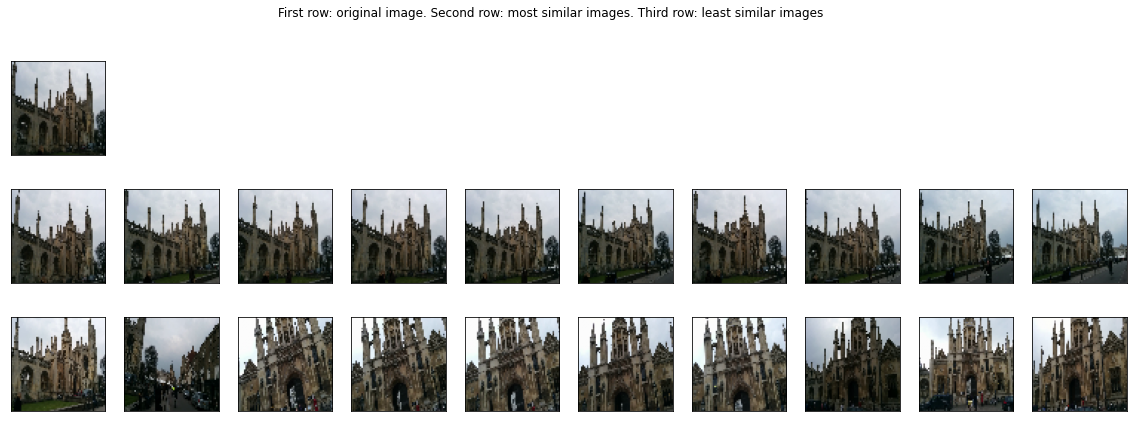

In [42]:
n=10
fig = plt.figure(figsize=(n*2, n/1.5))
plt.gray()
fig.suptitle('First row: original image. Second row: most similar images. Third row: least similar images')

img_shape = (64, 64, 3)

#display original
display_single_subplot(X_test[img_to_find_idx][0:64,0:64,:].reshape(img_shape), n_row=3, n_col=n, cell_num=1)
#display most similar
for i in range(n):
    similar_idx = similarity_sorted[i]
    display_single_subplot(X_test[similar_idx][0:64,0:64,:].reshape(img_shape), n_row=3, n_col=n, cell_num=n+i+1)
    
#display most dissimilar
for i in range(n):
    dissimilar_idx = similarity_sorted[-i-1]
    display_single_subplot(X_test[dissimilar_idx][0:64,0:64,:].reshape(img_shape), n_row=3, n_col=n, cell_num=2*n+i+1)

plt.show()

C:\Users\HAMROUA\Anaconda3\envs\GPUtensorflow\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


(312, 16, 22, 8)
Class  0


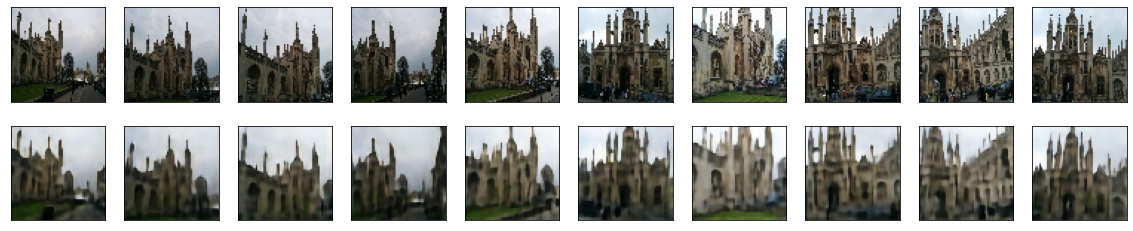

Class  1


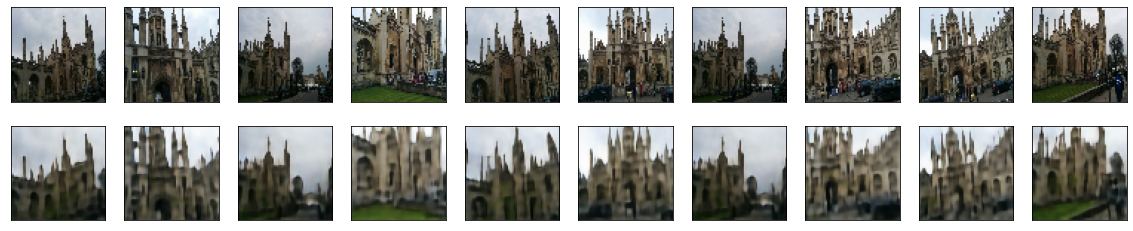

Class  2


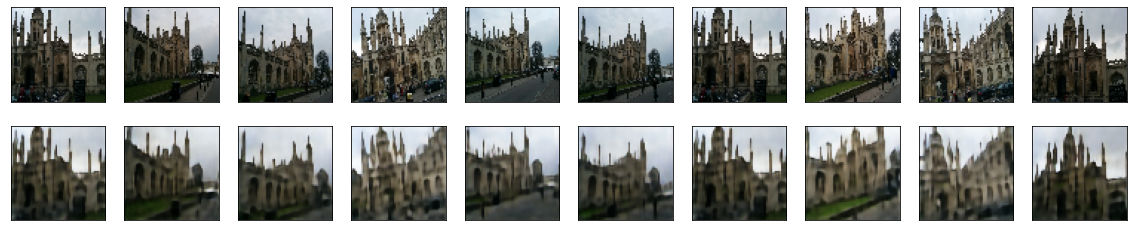

Class  3


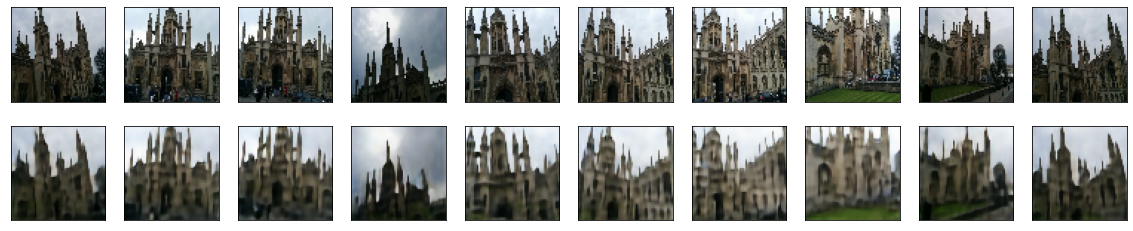

Class  4


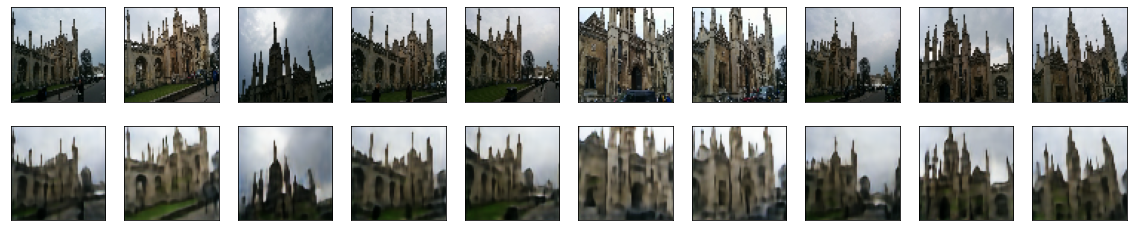

Class  5


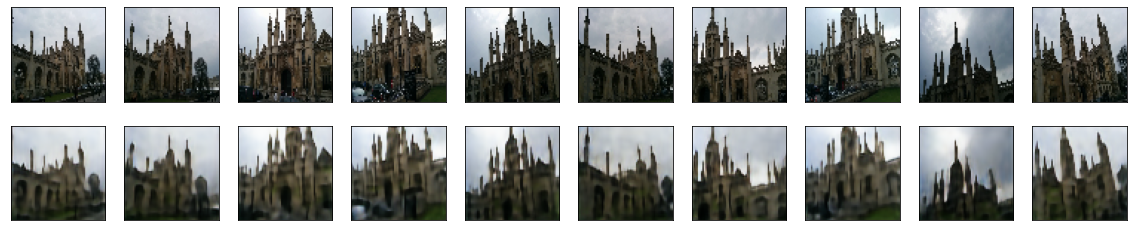

Class  6


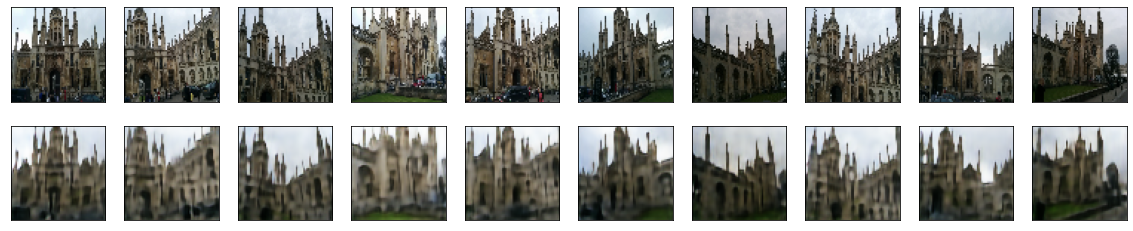

Class  7


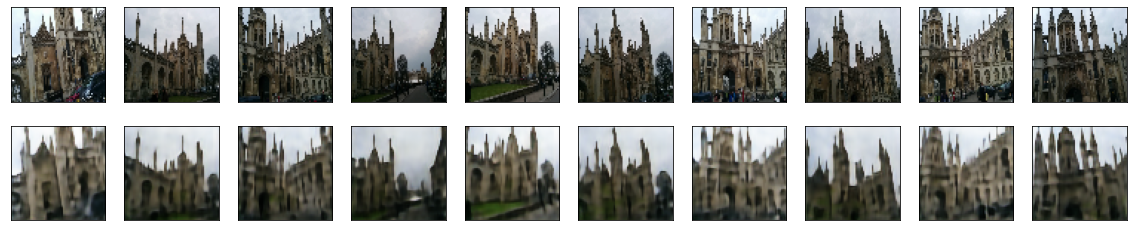

Class  8


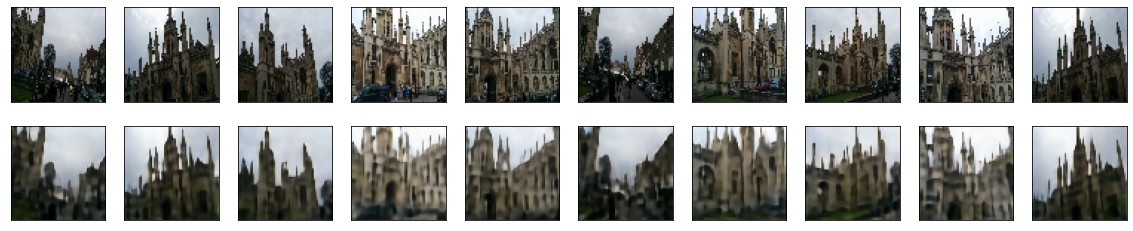

Class  9


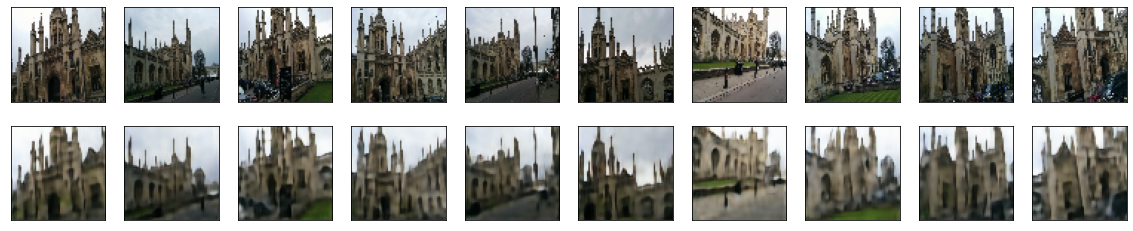

In [105]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import random
#an attempt to reduce the dimensions so that k-means clustering can work better
layer_name = 'encoded_layer'
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(layer_name).output)
decoded_imgs = autoencoder.predict(X_test)

pred = encoder.predict(X_test)
print(pred.shape)
pca = PCA(n_components=6)
pred.resize(10000,50)
principalComponents = pca.fit_transform(pred)
kmeans=KMeans(n_clusters=300,init='k-means++',max_iter=1000)
clustered_images = kmeans.fit_predict(principalComponents)
copy=clustered_images
for i in range(10):
    n = 10
    count = 0 
    print("Class ",i)
    indices = np.array(np.where(copy==i))
    plt.figure(figsize=(20, 4))
    for j in range(n):
      # display original
        pos = random.randint(0,243)
        ax = plt.subplot(2, n,j + 1)
        plt.imshow(X_test[pos][0:64,0:64,:].reshape(64,64,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

      # display reconstruction
        ax = plt.subplot(2, n, j + 1 + n)
        plt.imshow(decoded_imgs[pos][0:64,0:64,:].reshape(64,64,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        count+=1
    plt.show()

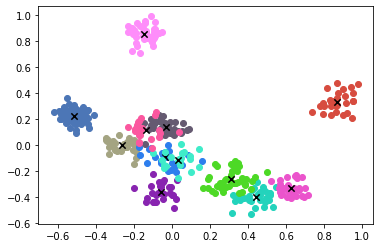

In [116]:
# Plot the clusters

import matplotlib.pyplot as plt

#filter rows of original data
filtered_label=[]
for i in range(0,700):
    filtered_label.append(principalComponents[clustered_images == i])
# filtered_label0 = principalComponents[clustered_images == 0]
# filtered_label1 = principalComponents[clustered_images == 1]
# filtered_label2 = principalComponents[clustered_images == 2]
# filtered_label3 = principalComponents[clustered_images == 3]
# filtered_label4 = principalComponents[clustered_images == 4]
# filtered_label5 = principalComponents[clustered_images == 5]
# filtered_label6 = principalComponents[clustered_images == 6]

import random

r = random.random()
b = random.random()
g = random.random()
c = (r, g, b)


#plotting the results
for i in range(0,299,25):
    plt.scatter(filtered_label[i][:,0] , filtered_label[i][:,1] , color = (random.random(),random.random(),random.random()))
    plt.scatter(kmeans.cluster_centers_[i, 0], 
            kmeans.cluster_centers_[i, 1], 
            s=40,                             # Set centroid size
            c='black', marker='x')      

# plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'blue')
# plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
# plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'yellow')
# plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'orange')
# plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'cyan')
# plt.scatter(filtered_label5[:,0] , filtered_label5[:,1] , color = 'green')
# plt.scatter(filtered_label6[:,0] , filtered_label6[:,1] , color = 'pink')

# plt.scatter(kmeans.cluster_centers_[:, 0], 
#             kmeans.cluster_centers_[:, 1], 
#             s=10,                             # Set centroid size
#             c='red')                           # Set centroid color


#Plotting the results


plt.show()